In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
def r_squared_error(b,m,points):
    #r-squared
    error = 0
    for [x,y] in points:
        error += (m*x+b-y)**2
    return error/float(len(points))

In [3]:
def step_gradient(b,m,points,learning_rate):
    b_grad,m_grad = 0,0
    n = float(len(points))
    for [x,y] in points:
        b_grad += (-2/n)*(y-(m*x+b))
        m_grad += (-2/n)*x*(y-(m*x+b))
    b = b - learning_rate * b_grad
    m = m - learning_rate * m_grad
    return b,m

In [4]:
def gradient_descent(points,m_initial,b_initial,learning_rate,num_iterations):
    b,m = b_initial,m_initial
    for i in range(num_iterations):
        b,m = step_gradient(b,m,points,learning_rate)
    return b,m

In [36]:
df = pd.read_csv('train.csv',names = ['x1','y'],skiprows = 1)
points = np.array(df)
#Shuffle
np.random.shuffle(points)

#75% in training set
size = int(len(points)*.75)
train,test = points[:size],points[size:] 

features_train,labels_train = [],[]
[(features_train.append(x),labels_train.append(y)) for [x,y] in train]

features_test,labels_test = [],[]
[(features_test.append(x),labels_test.append(y)) for [x,y] in test]

df

,x1,y
0,0.766652,0.299185
1,0.342835,0.963037
2,0.838514,0.703033
3,0.957296,0.998457
4,0.536795,0.106978
5,0.980666,0.071472
6,0.479315,0.272783
7,0.661224,0.779159
8,0.329131,0.569620
9,0.710158,0.630131


In [29]:
m_initial,b_initial = 0,0
learning_rate = 0.0001
num_iterations = 10000
m,b = gradient_descent(train,m_initial,b_initial,learning_rate,num_iterations)
print("Slope,Intercept : ",[m,b])

Slope,Intercept :  [0.37161959980853576, 0.16685101976807923]


In [30]:
min_train = min(features_train)
max_train = max(features_train)
getY = lambda x : m*x+b

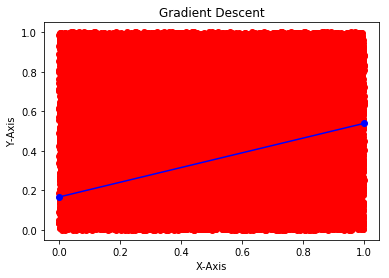

In [31]:
plt.plot(features_train,labels_train,"ro")
plt.plot([min_train,max_train],[getY(min_train),getY(max_train)],marker='o',color="b")
plt.xlabel("X-Axis"),plt.ylabel("Y-Axis"),plt.title("Gradient Descent")
plt.show()

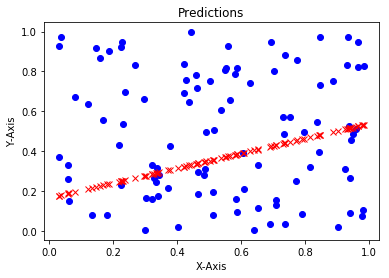

In [48]:
predict = [getY(x) for x in features_test]
no_of_points = 100
plt.plot(features_test[:no_of_points],labels_test[:no_of_points],"bo",label='label')
plt.plot(features_test[:no_of_points],predict[:no_of_points],"rx",label='Predictions')
plt.xlabel("X-Axis"),plt.ylabel("Y-Axis"),plt.title("Predictions")
plt.show()

In [45]:
print ("Error = ", r_squared_error(b,m,test[:no_of_points]))

Error 0.120446890535
